# Pripovedke iz gozda

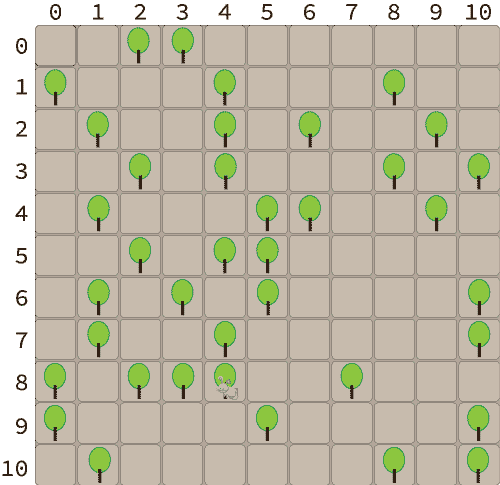

Imamo gozd. Se pravi drevesa. Na kvadratni mreži. Zaradi nekih novih norih evropskih predpisov.

Gozd na sliki opišemo s takšnimle seznamom nizov:

```python
gozd = ["..##.......",
        "#...#...#..",
        ".#..#.#..#.",
        "..#.#...#.#",
        ".#...##..#.",
        "..#.##.....",
        ".#.#.#....#",
        ".#..#.....#",
        "#.###..#...",
        "#....#....#",
        ".#......#.#"]
```

V nizu se pojavljata samo znaka `.` in `#`. Vsi nizi so enako dolgi. Širina in višina nista nujno enaki. Razpored dreves sem ukradel na Advent of Code (slika pa je moja, samo zajec je iz OpenClipart). Saj mu vsako leto iz hvaležnosti nekaj nakažem. Resno.

## Testi

Testi: [testi-pripovedke-iz-gozda.py](https://cdn.jsdelivr.net/gh/janezd/predavanja@master/p1/domace-naloge/2020/09%20pripovedke%20iz%20gozda/testi.py)


## Za ogrevanje

- `dimenzija(gozd)` vrne širino in višino gozda. V gornjem primeru `(11, 11)`.
- `je_drevo(x, y, gozd)` vrne `True`, če je na koordinatah (x, y) drevo in `False`, če ni.

Ker tu nimaš kaj čarati, bodo testi preverili tudi, da je tvoja funkcija dolga eno samo vrstico, se pravi en sam `return`. Kar je več, je preveč.

### Rešitev

Da bomo imeli funkcije na čem preskušati, si pripravimo `gozd`.

In [1]:
gozd = ["..##.......",
        "#...#...#..",
        ".#..#.#..#.",
        "..#.#...#.#",
        ".#...##..#.",
        "..#.##.....",
        ".#.#.#....#",
        ".#..#.....#",
        "#.###..#...",
        "#....#....#",
        ".#......#.#"]

In [2]:
def dimenzije(gozd):
    return len(gozd[0]), len(gozd)

dimenzije(gozd)

(11, 11)

In [3]:
def je_drevo(x, y, gozd):
    return gozd[y][x] == "#"

In [4]:
je_drevo(4, 1, gozd)

True

In [5]:
je_drevo(2, 1, gozd)

False

V drugi funkciji ne smemo prezreti, da elementi seznama `gozd` predstavljajo vrstice, znotraj teh pa imamo stolpce, zato `gozd[y][x]` in ne `gozd[x][y]`.

Funkciji je bilo potrebno napisati v eni vrstici. To sem zahteval predvsem zaradi druge, da bi vas odvadil pisati

```python
def je_drevo(x, y, gozd):
    if gozd[y][x] == "#":
        return True
    else:
        return False
```

## Za oceno 6: Revirni gozdar

- `vsa_drevesa(gozd)` vrne množico koordinat vseh dreves.
- `stevilo_dreves(x0, y0, x1, y1)` vrne število dreves v pravokotniku med (x0, y0) in (x1, y1); prvo oglišče je vključeno, drugo ne - podobno kot `range` in rezine v Pythjonu. Predpostaviti smeš, da je x1 >= x0 in y1 >= y0. `stevilo_dreves(2, 3, 4, 6, gozd)` naj vrne 2, saj stolpec 4 in vrstica 6 nista vključeni.
- `ni_dreves(x0, y0, x1, y1)` vrne `True`, če znotraj pravokotnika med (x0, y0) in (x1, y1) ni dreves. Tudi s to funkcijo moraš opraviti v enem zamahu - samo `return`.

### `vsa_drevesa`

Ena možnost je ta:

In [6]:
def vsa_drevesa(gozd):
    sirina, visina = dimenzije(gozd)
    drevesa = set()
    for x in range(sirina):
        for y in range(visina):
            if je_drevo(x, y, gozd):
                drevesa.add((x, y))
    return drevesa

Tole so vsa drevesa v prvih dveh vrsticah:

In [7]:
vsa_drevesa(gozd[:2])

{(0, 1), (2, 0), (3, 0), (4, 1), (8, 1)}

Osebno imam raje tole. Ne potrebujemo dimenzij, predvsem pa: potrebujemo vrstice (in znake) in indekse, kar je vedno lepo narediti z `enumerate`.

In [8]:
def vsa_drevesa(gozd):
    drevesa = set()
    for y, vrstica in enumerate(gozd):
        for x, c in enumerate(vrstica):
            if c == "#":
                drevesa.add((x, y))
    return drevesa

Je pa to očitno stvar okusa. Eno ali drugo lahko spremenimo v izpeljano množico: vrniti je potrebno množico koordinat, na katerih ni dreves.

In [9]:
def vsa_drevesa(gozd):
    return {(x, y)
            for x in range(len(gozd[0])) for y in range(len(gozd))
            if je_drevo(x, y, gozd)}

ali

In [10]:
def vsa_drevesa(gozd):
    return {(x, y)
            for y, vrstica in enumerate(gozd) for x, c in enumerate(vrstica)
            if c == "#"}

Mogoče je še najlepše tako,

In [11]:
def vsa_drevesa(gozd):
    sirina, visina = dimenzije(gozd)
    return {(x, y)
            for x in range(sirina) for y in range(visina)
            if je_drevo(x, y, gozd)}

vendar vam testi tega ne bi priznali kot eno vrstico.

### `stevilo_dreves`

Rešitev je:

In [12]:
def stevilo_dreves(x0, y0, x1, y1, gozd):
    v = 0
    for x in range(x0, x1):
        for y in range(y0, y1):
            if je_drevo(x, y, gozd):
                v += 1
    return v

stevilo_dreves(2, 3, 4, 6, gozd)

2

Zanimiva čudna rešitev, ki jo je napisalo veliko študentov, je, da so spustili `x` in `y` prek celotnega gozda, potem pa upoštevali samo drevesa, ki so znotraj iskanega intervala.

In [13]:
def stevilo_dreves(x0, y0, x1, y1, gozd):
    sirina, visina = dimenzije(gozd)
    v = 0
    for x in range(sirina):
        for y in range(visina):
            if x0 <= x < x1 and y0 <= y < y1 and je_drevo(x, y, gozd):
                v += 1
    return v

To deluje, vendar nima smisla: če nas zanima le koordinate znotraj nekega intervala, gremo pač le prek tega intervala.

To bi bilo smiselno, če bi šli prek vseh dreves in za vsako preverili, ali je znotraj iskanih koordinat. Če že ravno imamo funkcijo `vsa_drevesa`.

In [14]:
def stevilo_dreves(x0, y0, x1, y1, gozd):
    v = 0
    for x, y in vsa_drevesa(gozd):
        if x0 <= x < x1 and y0 <= y < y1:
            v += 1
    return v

Če vemo, da je `True` enak `1` in `False` enak `0`, lahko seštevamo kar te `True`-je in `False`.

In [15]:
def stevilo_dreves(x0, y0, x1, y1, gozd):
    v = 0
    for x, y in vsa_drevesa(gozd):
        v += x0 <= x < x1 and y0 <= y < y1
    return v

To nas vodi direktno v rešitev z generatorjem.

In [16]:
def stevilo_dreves(x0, y0, x1, y1, gozd):
    return sum(x0 <= x < x1 and y0 <= y < y1 for x, y in vsa_drevesa(gozd))

Podobno pa je mogoče preobrniti tudi prvo funkcijo.

In [17]:
def stevilo_dreves(x0, y0, x1, y1, gozd):
    return sum(je_drevo(x, y, gozd) for x in range(x0, x1) for y in range(y0, y1))

### `ni_dreves`

Ni kaj. :)

In [18]:
def ni_dreves(x0, y0, x1, y1, gozd):
    return stevilo_dreves(x0, y0, x1, y1, gozd) == 0

Nekdo je vprašal, ali ta rešitev velja ali se šteje za goljufijo. Seveda velja. Tako je bilo mišljeno.


## Za oceno 7: Ljubitelj dreves

- `dreves_na_33(x, y, gozd)` vrne število dreves na kvadratu dimenzij 3x3 z gornjim levim ogliščem na (x, y). To funkcijo napiši tako, da ima le `return`.
- Nekdo kupuje parcelo velikosti 3x3 in bi rad čimveč dreves. `naj_kvadrat(gozd)` vrne največje število dreves, ki ga najdemo v kakem kvadratu dimenzij 3x3.

### `dreves_na_33`

Tudi to velja. Tudi to je bilo tako mišljeno.

In [19]:
def dreves_na_33(x, y, gozd):
    return stevilo_dreves(x, y, x + 3, y + 3, gozd)

Bistvo te funkcije je predvsem, da se zavedate, da morate k `x` in k `y` prišteti 3, ker spodnje desno oglišče *ni vključeno*. Na ta način pregledujemo vse med `(x, y)` in (vključno) `(x + 2, y + 2)`.

### `naj_kvadrat`

In [20]:
def naj_kvadrat(gozd):
    naj_dreves = 0
    sirina, visina = dimenzije(gozd)
    for x in range(sirina - 2):
        for y  in range(visina - 2):
            naj_dreves = max(naj_dreves, dreves_na_33(x, y, gozd))
    return naj_dreves

Bistvo te funkcije pa je, da se zavedamo, da moramo napisati `range(sirina - 2)`. Tako bo največji `x` enak `sirina - 3`. Tu se namreč začne zadnji dovoljen kvadrat dimenzij 3x3 - zadnji dovoljeni x-i so `sirina - 3`, `sirina - 2` in `sirina - 1`.

Namesto

```python
            dreves = dreves_na_33(x, y, gozd)
            if dreves > naj_dreves:
                naj_dreves = dreves
```

smo si pomagali s funkcijo `max`. Za malo spremembe. :)

Različica z generatorjem je

In [21]:
def naj_kvadrat(gozd):
    return max(
        dreves_na_33(x, y, gozd)
        for x in range(len(gozd[0]) - 2) for y in range(len(gozd) - 2))

Gremo čez vse koordinate, za vsako izračunamo `dreves_na_33(x, y, gozd)` in pogledamo maksimum le-tega.

### Za oceno 8: Grm, v katerem tiči zajec

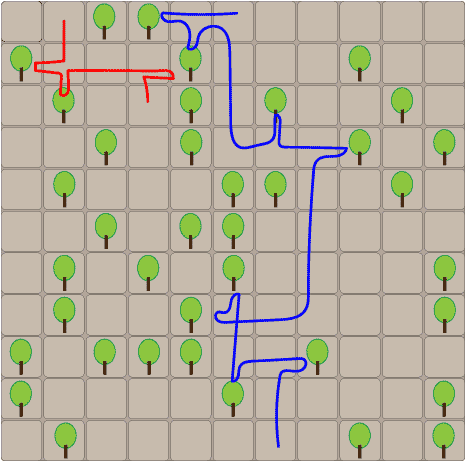

- `lovec(x, y, pot, gozd)` vrne število bušk, ki jih dobi pijani lovec, če se v začetku nahaja na koordinatah (x, y) in poskuša prehoditi podano `pot`. Kadar se zaleti v drevo, *ne more narediti* nameravanega koraka, temveč le dobi buško. Če poskuša zapustiti gozd, mu ne uspe, saj je okoli gozda ograja. Rdeča pot na sliki ustreza klicu `lovec(1, 0, "v<v>>>v", self.gozd)` (**pozorno poglej!**); funkcija v tem primeru vrne 3, saj se zaleti trikrat. Modra pot kaže drugo pot, ki jo testirajo testi.

- Zajec se boji, da ga lovec, ker je pijan, slučajno ne bi celo zadel. Ve, da so lovci na vrhu gozda, zato poišče stolpec z največ drevesi in se skrije za najbolj spodnje drevo v tem stolpcu. V našem gozdu je to stolpec 4 in zajec tiči za drevesom (4, 8). Da je res tako, dokazuje prva slika.

    Funkcija `zajec(drevesa)` prejme množico koordinat dreves (kot jo vrne `vsa_drevesa`) in ne seznama nizov, vrne pa koordinate drevesa, za katerim bo trepetal zajec.
    
### `lovec`

Funkcija ni zapletena, lahko pa postane takšna, če se je lotimo nerodno.

In [22]:
def lovec(x, y, pot, gozd):
    sirina, visina = dimenzije(gozd)
    buske = 0
    for c in pot:
        dx, dy = {"^": (0, -1), "v": (0, 1), "<": (-1, 0), ">": (1, 0)}[c]
        nx, ny = x + dx, y + dy
        if not (0 <= nx < sirina and 0 <= ny < visina):
            continue
        elif je_drevo(nx, ny, gozd):
            buske += 1
        else:
            x, y = nx, ny
    return buske

Prvi trik: spremembi damo v `dx` in `dy`, s čimer se rešimo seznama zoprnih `if`-ov. Ta trik smo videli pred nekaj tedni, v nalogi `srecanja`.

Naslednji trik: namesto da bi naračunali novi koordinati naravnost v `x` in `y`, ju začasno naračunamo v `nx` in `ny`.

Nato pa:
- če je to izven koordinat, se ne zgodi nič
- če je tam drevo, se zgodi buška
- če nič od tega, spremenimo `x` in `y`.

Očitno bi lahko pisali tudi

```python
        if 0 <= nx < sirina and 0 <= ny < visina:
            if je_drevo(nx, ny, gozd):
                buske += 1
            else:
                x, y = nx, ny
```

vendar mi je gornja rešitev všeč, ker program beži manj desno. Poleg tega pa mi je všeč tudi, da eksplicitno pove, da ne bo naredil ničesar, če so koordinate izven dovoljenih meja.

### `zajec`

Za to nalogo se moram pa skoraj malo opravičiti. Sam sem jo rešil le v eni vrstici in se mi je zdela čisto preprosta. Šele ob pisanju tega besedila - ko ste nalogo že davno začeli reševati  - pa sem videl, da rešitev brez izpeljanih seznamov sploh ni tako preprosta in kratka. Takšna je.

In [23]:
def zajec(drevesa):
    sirina = max(drevesa)[0] + 1

    naj_koord = None
    naj_dreves = 0
    for x in range(sirina):
        stolpec = []
        for x0, y0 in drevesa:
            if x0 == x:
                stolpec.append(y0)

        if len(stolpec) > naj_dreves:
            naj_dreves = len(stolpec)
            naj_koord = (x, max(stolpec))
    return naj_koord

Najprej izvemo, širino: v množici `drevesa` poiščemo maksimalni element. Gre za pare, torej bomo dobili tistega z največjim prvim elementom. Iz tega para poberemo prvi element (zato `[0]`) in prištejemo `1`, saj gredo `x`-i od `0`, torej je širina za 1 večja od največje koordinate.

Nato gremo prek vseh stolpcev. Za vsakega naberemo v `stolpec` vse `y` koordinate v tistem stolpcu. Če je v tem stolpcu več dreves kot v največjem doslej, si zapomnimo to število dreves in koordinate spodnjega drevesa, torej trenutni `x` in največji element tega stolpca.

Zdaj pa z izpeljanimi množicami.

`x` bomo spustili prek množice vse `x` koordinat: `for x in {x for x, y in drevesa}`. Za vsak takšen `x` izračunamo vse koordinate dreves v njem `{(y, x) for x0, y in drevesa if x0 == x}`. 
Združimo: tole so množice dreves, grupirane po stolpcih.

```python
({(y, x) for x0, y in drevesa if x0 == x}
 for x in {x for x, y in drevesa})
```

Izmed njih nas zanima največja:

```python
max(({(y, x) for x0, y in drevesa if x0 == x}
             for x in {x for x, y in drevesa}), key=len)
```

Z `max(..., key=len)` dobimo tisti element, ki ima največ elementov. Torej stolpec z največ drevesi. En sam stolpec. Rezultat tega `max`-a je množice koordinat `(y, x)`, **ne `(x, y)`**. Zato lahko zdaj poiščemo "največjo" koordinato -- dobili bomo tisto, ki ima največji `y`.

```python
max(
    max(({(y, x) for x0, y in drevesa if x0 == x}
        for x in {x for x, y in drevesa}), key=len)
)
```

Tole bo (y, x) koordinata najnižjega drevesa v stolpcu z največ drevesi. Ker je potrebno vrniti (x, y) in ne (y, x), to še obrnemo. Funkcija je torej

In [24]:
def zajec(drevesa):
    return max(
        max(({(y, x) for x0, y in drevesa if x0 == x}
             for x in {x for x, y in drevesa}), key=len)
    )[::-1]

## Za oceno 9: Kot hudičev boršt, vendar jasa

- `razdalja(x0, y0, x1, y1)` vrne (evklidsko) razdaljo med (x0, y0) in (x1, y1). Pitagora pa to.
- `bliznja_drevesa(x, y, r, drevesa)` vrne množico koordinat dreves, ki so od podanega drevesa oddaljena `r` ali manj. Argument je spet množica koordinat dreves in ne seznam nizov.
- `povezana_drevesa(r, drevesa)` vrne slovar, katerega ključi so koordinate dreves, pripadajoče vrednosti pa množice dreves, ki so od posameznega drevesa oddaljene za največ `r`.
- `jasa(gozd)` vrne površino največje jase, to je pravokotnika brez dreves. Štejejo seveda le pravokotniki, kateri stranice so poravnane s koordinatnima osema, ne pravokotniki zasukani pod poljubnim kotom. Argument je tokrat spet seznam nizov.

- Da dokažeš svojo programersko spretnost, vse funkcije za ocene 6-9 napiši v eni sami vrstici, z uporabo izpeljanih seznamov, slovarjev, množic, generatorjev. Več vrstic si lahko privoščiš le pri `lovec`, `zajec` in `jasa`.

### `razdalja`, `bliznja_drevesa` in `povezana_drevesa`

Tole je skoraj dolgočasno.

In [25]:
def razdalja(x0, y0, x1, y1):
    return sqrt((x0 - x1) ** 2 + (y0 - y1) ** 2)

def bliznja_drevesa(x, y, r, drevesa):
    return {(x0, y0) for (x0, y0) in drevesa if razdalja(x, y, x0, y0) <= r} - {(x, y)}

def povezana_drevesa(r, drevesa):
    return {(x, y): bliznja_drevesa(x, y, r, drevesa) for (x, y) in drevesa}

Edino, kar je vredno komentarja, je, da v `bliznja_drevesa` na koncu preprosto odštejemo množico, ki vsebuje koordinate podanega drevesa `{(x, y)}`.

### `jasa`

Z jaso ne komplicirajmo: ena za levi x (`x0`), ena za desni (`x1`), ena za zgornji y (`y0`), ena za spodnji (`y1`). Pri tem najprej naredimo zanko za desni x, tako da levi teče le do njega. Enako za y.

Za vsako četvorico koordinat izračunamo ploščino. Če je ploščina med temi koordinatami večja od največje doslej, preverimo, da tam ni dreves. Če je tako, imamo novega zmagovalca.

In [26]:
def jasa(gozd):
    najni = None
    for x1 in range(len(gozd[0]) + 1):
        for x0 in range(x1):
            for y1 in range(len(gozd) + 1):
                for y0 in range(y1):
                    p = (x1 - x0) * (y1 - y0)
                    if (not najni or p > najni) and ni_dreves(x0, y0, x1, y1, gozd):
                        najni = p
    return najni

To se da na različne načine izboljševati, a ni vredno. Kakšne neverjetno hitre rešitve ne bomo dobili.

Le še v eno vrstico jo prevrnimo: iščemo največjo ploščino za koordinate, med katerimi ni dreves.

In [27]:
def jasa(gozd):
    return max((x1 - x0) * (y1 - y0)
               for x1 in range(len(gozd[0]) + 1)
               for x0 in range(x1)
               for y1 in range(len(gozd) + 1)
               for y0 in range(y1)
               if ni_dreves(x0, y0, x1, y1, gozd))

Tole je lep primer, zakaj se učimo programiranja z generatorji: tale rešitev je gotovo preglednejša od tiste, v kateri napišemo štiri "običajne" zanke.

## Za oceno 10: Tujerodna vrsta

- V gozdu se je naselila opica. Opice rade skačejo z drevesa na drevo. Funkcija `opica(x, y, r, drevesa)` naj vrne množico koordinat vseh dreves, do katerih lahko priskače opica, če začne na koordinatah (x, y) in lahko skoči največ `r` daleč, vmes pa seveda nikoli ne gre na tla. Drevesa so podana z množico koordinat.

- Poleg tega poskrbi, da bosta v eni vrstici napisana tudi `zajec` in `jasa`. Na daljši način bosta napisani le še `lovec` in `opica`.

### Rešitev

Za vse, kar je potrebno pisati v eni vrstici smo poskrbeli sproti.

Opico pa uženemo tako. Pripravili bomo slovar povezanih dreves. Tako bomo za vsako drevo hitro prišli do tistih, ki jih opica doseže z njega.

Sestavljali bomo seznam dosegljivih dreves. Na koncu je sicer res potrebno vrniti množico, vendar tole z množico ne bi delovalo. (Bomo videli, zakaj.)

Nato gremo z zanko prek dosegljivih dreves. Za vsako dosegljivo drevo, dodamo v seznam dosegljivih dreves vsa drevesa, ki so dosegljiva z njega in ga še ni v seznamu.

To je vse. :)

In [28]:
def opica(x, y, r, drevesa):
    povezave = povezana_drevesa(r, drevesa)

    dosegljiva = [(x, y)]
    for drevo in dosegljiva:
        for drevo0 in povezave[drevo]:
            if drevo0 not in dosegljiva:
                dosegljiva.append(drevo0)
    return set(dosegljiva)

Zanka `for` teče prek seznama, ki se sproti dopolnjuje. To deluje - za sezname. Za množice pa  ne bi.

Gre pa še malo krajše, če gornji "vsa drevesa, ki so dosegljiva z njega in ga še ni v seznamu" izvedemo z razliko množic.

In [29]:
def opica(x, y, r, drevesa):
    dosegljiva = [(x, y)]
    povezave = povezana_drevesa(r, drevesa)
    for drevo in dosegljiva:
        dosegljiva += povezave[drevo] - set(dosegljiva)
    return set(dosegljiva)

## Vse rešitve skupaj

```python
# Ogrevanje

def dimenzije(gozd):
    return len(gozd[0]), len(gozd)  # to mmorajo v eni vrstici

def je_drevo(x, y, gozd):
    return gozd[y][x] == "#"   # to morajo v eni vrstici


# 6

def vsa_drevesa(gozd):
    return {(x, y)
            for x in range(len(gozd[0])) for y in range(len(gozd))
            if je_drevo(x, y, gozd)}

def stevilo_dreves(x0, y0, x1, y1, gozd):
    return sum(je_drevo(x, y, gozd)
               for x in range(x0, x1) for y in range(y0, y1))

def ni_dreves(x0, y0, x1, y1, gozd):
    return not stevilo_dreves(x0, y0, x1, y1, gozd)


# 7

def dreves_na_33(x, y, gozd):
    return stevilo_dreves(x, y, x + 3, y + 3, gozd)

def naj_kvadrat(gozd):
    return max(
        dreves_na_33(x, y, gozd)
        for x in range(len(gozd[0]) - 2) for y in range(len(gozd) - 2))


# 8

def lovec(x, y, pot, gozd):
    sirina, visina = dimenzije(gozd)
    buske = 0
    for c in pot:
        dx, dy = {"^": (0, -1), "v": (0, 1), "<": (-1, 0), ">": (1, 0)}[c]
        nx, ny = x + dx, y + dy
        if not (0 <= nx < sirina and 0 <= ny < visina):
            continue
        elif je_drevo(nx, ny, gozd):
            buske += 1
        else:
            x, y = nx, ny
    return buske

def zajec(drevesa):
    return max(
        max(({(y, x) for x0, y in drevesa if x0 == x}
             for x in {x for x, y in drevesa}), key=len)
    )[::-1]


# 9

def razdalja(x0, y0, x1, y1):
    return sqrt((x0 - x1) ** 2 + (y0 - y1) ** 2)

def bliznja_drevesa(x, y, r, drevesa):
    return {(x0, y0) for (x0, y0) in drevesa if razdalja(x, y, x0, y0) <= r} - {(x, y)}

def povezana_drevesa(r, drevesa):
    return {(x, y): bliznja_drevesa(x, y, r, drevesa) for (x, y) in drevesa}

def jasa(gozd):
    return max((x1 - x0) * (y1 - y0)
               for x1 in range(len(gozd[0]) + 1)
               for x0 in range(x1)
               for y1 in range(len(gozd) + 1)
               for y0 in range(y1)
               if ni_dreves(x0, y0, x1, y1, gozd))


# 10

def opica(x, y, r, drevesa):
    dosegljiva = [(x, y)]
    povezave = povezana_drevesa(r, drevesa)
    for drevo in dosegljiva:
        dosegljiva += povezave[drevo] - set(dosegljiva)
    return set(dosegljiva)
```